In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

housedatatrain = pd.read_csv("./train.csv")
housedatatest = pd.read_csv("./test.csv")

#save the saleprice before dropping it
SalePrice = housedatatrain.SalePrice


#add NaN for the SalePrice to the real test data
housedatatest['SalePrice'] = np.nan




In [8]:
#########################cleaning basement variables######################################################
#first, check rows where TotalBsmtSF is 0, and set BsmtQual, BsmtCond, BsmtExposure, and BsmtFinType1 to "None"

#train cleaning
housedatatrain.iloc[housedatatrain.loc[housedatatrain['TotalBsmtSF']==0].index, 
                    [housedatatrain.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1"]]] = "None"

#test cleaning
housedatatest.iloc[housedatatest.loc[housedatatest['TotalBsmtSF']==0].index, 
                   [housedatatest.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1"]]] = "None"


#check rows where BsmtFinSF2 is 0, and set BsmtFinType2 to None
#train cleaning
housedatatrain.iloc[housedatatrain.loc[housedatatrain['BsmtFinSF2']==0].index, 
                    housedatatrain.columns.get_loc("BsmtFinType2")] = "None"

#test cleaning
housedatatest.iloc[housedatatest.loc[housedatatest['BsmtFinSF2']==0].index, 
                   housedatatest.columns.get_loc("BsmtFinType2")] = "None"


#check if BsmtQual, BsmtCond, and BsmtExposure are NA: if they are, set them and BsmtFinType1 and BsmtFinType2 to None, 
# set BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF to 0

#train cleaning

#cleaning basement variables
#first, check rows where TotalBsmtSF is 0, and set BsmtQual, BsmtCond, BsmtExposure, and BsmtFinType1 to "None"

#train cleaning
housedatatrain.iloc[housedatatrain.loc[housedatatrain['TotalBsmtSF']==0].index, 
                    [housedatatrain.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1"]]] = "None"

#test cleaning
housedatatest.iloc[housedatatest.loc[housedatatest['TotalBsmtSF']==0].index, 
                   [housedatatest.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1"]]] = "None"


#check rows where BsmtFinSF2 is 0, and set BsmtFinType2 to None
#train cleaning
housedatatrain.iloc[housedatatrain.loc[housedatatrain['BsmtFinSF2']==0].index, 
                    housedatatrain.columns.get_loc("BsmtFinType2")] = "None"

#test cleaning
housedatatest.iloc[housedatatest.loc[housedatatest['BsmtFinSF2']==0].index, 
                   housedatatest.columns.get_loc("BsmtFinType2")] = "None"


#check if BsmtQual, BsmtCond, and BsmtExposure are NA: if they are, set them and BsmtFinType1 and BsmtFinType2 to None, 
# set BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF to 0

#train cleaning
housedatatrain.iloc[housedatatrain.loc[(housedatatrain['BsmtQual'].isnull()) & (housedatatrain['BsmtCond'].isnull())
                  & (housedatatrain['BsmtExposure'].isnull())].index, 
                    [housedatatrain.columns.get_loc(c) for c in ['BsmtFinSF1', "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]] = 0


housedatatrain.iloc[housedatatrain.loc[(housedatatrain['BsmtQual'].isnull()) & (housedatatrain['BsmtCond'].isnull())
                  & (housedatatrain['BsmtExposure'].isnull())].index, 
                    [housedatatrain.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1",
                                                                "BsmtFinType2"]]] = "None"





#test cleaning
housedatatest.iloc[housedatatest.loc[(housedatatest['BsmtQual'].isnull()) & (housedatatest['BsmtCond'].isnull())
                  & (housedatatest['BsmtExposure'].isnull())].index, 
                    [housedatatest.columns.get_loc(c) for c in ['BsmtFinSF1', "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]] = 0




housedatatest.iloc[housedatatest.loc[(housedatatest['BsmtQual'].isnull()) & (housedatatest['BsmtCond'].isnull())
                  & (housedatatest['BsmtExposure'].isnull())].index, 
                    [housedatatest.columns.get_loc(c) for c in ['BsmtQual', "BsmtCond", "BsmtExposure", "BsmtFinType1",
                                                                "BsmtFinType2"]]] = "None"


#change the BsmtFullBath and BsmtHalfBath to 0 when TotalBsmtSF is 0

#train cleaning
housedatatrain.iloc[housedatatrain.loc[housedatatrain['BsmtFinSF2']==0].index, 
                    [housedatatest.columns.get_loc(c) for c in ["BsmtFullBath", "BsmtHalfBath"]]] = 0


#test cleaning
housedatatest.iloc[housedatatest.loc[housedatatest['BsmtFinSF2']==0].index, 
                   [housedatatest.columns.get_loc(c) for c in ["BsmtFullBath", "BsmtHalfBath"]]] = 0





In [9]:
##########################clean garage variables#######################################################
#clean up GarageType
#if GarageType is NA, then GarageType goes to None
housedatatrain["GarageType"].fillna("None", inplace = True)
housedatatest["GarageType"].fillna("None", inplace = True)

#if GarageArea is NA, then change GarageType to None
housedatatrain.loc[housedatatrain["GarageArea"].isnull(),"GarageType"] = "None"
housedatatest.loc[housedatatest["GarageArea"].isnull(),"GarageType"] = "None"

#GarageCond, GarageQual, and GarageFinish

#if GarageType is None, change GarageCond, GarageQual, and GaragaeFinish to None
housedatatrain.iloc[housedatatrain.loc[housedatatrain['GarageType']=="None"].index, 
                     [housedatatrain.columns.get_loc(c) for c in ['GarageCond', "GarageQual", "GarageFinish"]]] = "None"

housedatatest.iloc[housedatatest.loc[housedatatest['GarageType']=="None"].index, 
                     [housedatatest.columns.get_loc(c) for c in ['GarageCond', "GarageQual", "GarageFinish"]]] = "None"


#GarageYear
#Substitute YearBuilt for missing data in GarageYear
##check this - does this make sense??
housedatatrain["GarageYrBlt"].fillna(housedatatrain["YearBuilt"], inplace = True)
housedatatest["GarageYrBlt"].fillna(housedatatest["YearBuilt"], inplace = True)

#GarageArea
#change NA values to 0

housedatatrain["GarageArea"].fillna(0, inplace = True)
housedatatest["GarageArea"].fillna(0, inplace = True)

#GarageCars
#change NA values to 0

housedatatrain["GarageCars"].fillna(0, inplace = True)
housedatatest["GarageCars"].fillna(0, inplace = True)







In [10]:
#######################clean Pool variables#############################################

#if Pool area is 0, then set PoolQc to None
housedatatrain.loc[housedatatrain["PoolArea"] == 0,'PoolQC'] = "None"
housedatatest.loc[housedatatest["PoolArea"] == 0,'PoolQC'] = "None"




In [11]:
######################clean masonry variables##########################################
#MasVnrArea if NaN, set to 0
housedatatrain["MasVnrArea"].fillna(0, inplace = True)
housedatatest["MasVnrArea"].fillna(0, inplace = True)

#MasVnrType if MasVnrArea is 0, set to MasVnrType to "None"
housedatatrain.iloc[housedatatrain.loc[housedatatrain['MasVnrArea']==0].index, 
                    housedatatrain.columns.get_loc("MasVnrType")] = "None"

housedatatest.iloc[housedatatest.loc[housedatatest['MasVnrArea']==0].index, 
                   housedatatest.columns.get_loc("MasVnrType")] = "None"


In [12]:
####################clean Alley variable################################################
#MasVnrArea if NaN, set to None
housedatatrain["Alley"].fillna("None", inplace = True)
housedatatest["Alley"].fillna("None", inplace = True)





In [13]:
####################clean FireplaceQu##################################################
#if Fireplaces = 0, set FireplaceQu to None
housedatatrain.iloc[housedatatrain.loc[housedatatrain['Fireplaces']==0].index, 
                    housedatatrain.columns.get_loc("FireplaceQu")] = "None"

housedatatest.iloc[housedatatest.loc[housedatatest['Fireplaces']==0].index, 
                   housedatatest.columns.get_loc("FireplaceQu")] = "None"



In [14]:
####################clean Fence##################################################
housedatatrain["Fence"].fillna("None", inplace = True)
housedatatest["Fence"].fillna("None", inplace = True)


In [15]:
###############Clean Miscellaneous Features########################################
housedatatrain["MiscFeature"].fillna("None", inplace = True)
housedatatest["MiscFeature"].fillna("None", inplace = True)


In [17]:
#some categorical columns should be numeric, and some numeric columns should be categorical
housedatatrain = housedatatrain.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

housedatatest = housedatatest.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

housedatatrain = housedatatrain.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

housedatatest = housedatatest.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })


In [18]:
#remove outliers from train set - 4 datapoints with square feet above 4000
housedatatrain = housedatatrain.loc[housedatatrain['GrLivArea'] < 4000, :]





In [20]:



#Write the cleaned data back to a csv file
housedatatrain.to_csv ('./traincleaned.csv', index = None, header=True)
housedatatest.to_csv ('./testcleaned.csv', index = None, header=True)



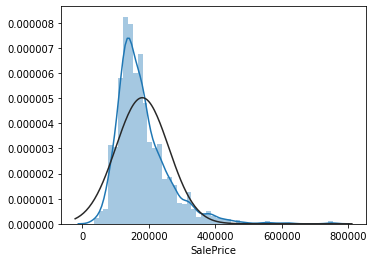

In [3]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(SalePrice, fit=stats.norm);
#plt.subplot(1,2,2)
#_=stats.probplot(SalePrice, plot=plt)

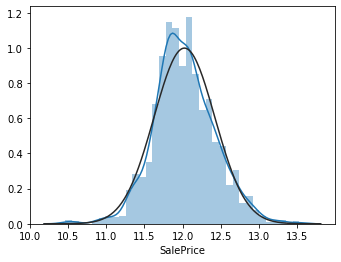

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(np.log(SalePrice), fit=stats.norm);